In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,10

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LMS datasets/data.csv', header=0, index_col=0)
print('Number of rows and columns:', df.shape)
df = df.reset_index(drop=True)
df.head()

Number of rows and columns: (8340, 20)


,ID,\tDate/Time (yy/mm/dd),\tTem (C),Hum (%),\tPressure (Pa),\tRain (mm),\tLight intensity (lux),\tAx,Ay,Az,Wx,Wy,Wz,Pitch,Roll,Yaw,Count,cumcount,Force (N),Moisture (%)
0,1187551,2022-08-02 13:40:48,26.4,99,1012.72,0.0,17.50,-0.41,0.02,0.96,-48.72,35.85,-4.76,0,0,0,0,0,0,407
1,1187539,2022-08-02 13:29:35,26.4,99,1012.48,0.0,24.17,-0.41,0.01,0.96,-50.37,35.49,-3.90,0,0,0,0,0,0,406
2,1187526,2022-08-02 13:18:22,26.1,99,1012.74,0.0,25.83,-0.41,0.02,0.95,-48.05,33.23,-4.88,0,0,0,0,0,0,405
3,1187503,2022-08-02 12:56:06,25.8,99,1013.15,0.0,21.67,-0.41,0.03,0.96,-48.78,34.39,-4.02,0,0,0,0,0,0,402
4,1187480,2022-08-02 12:33:40,25.1,99,1013.08,0.0,10.83,-0.41,0.02,0.96,-48.05,33.29,-4.51,0,0,0,0,0,0,401


In [ ]:
stat, p = stats.normaltest(df.cumcount)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=11370.873, p=0.000
Data does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: 66.76088807858278
Skewness of normal distribution: 8.189307891795973


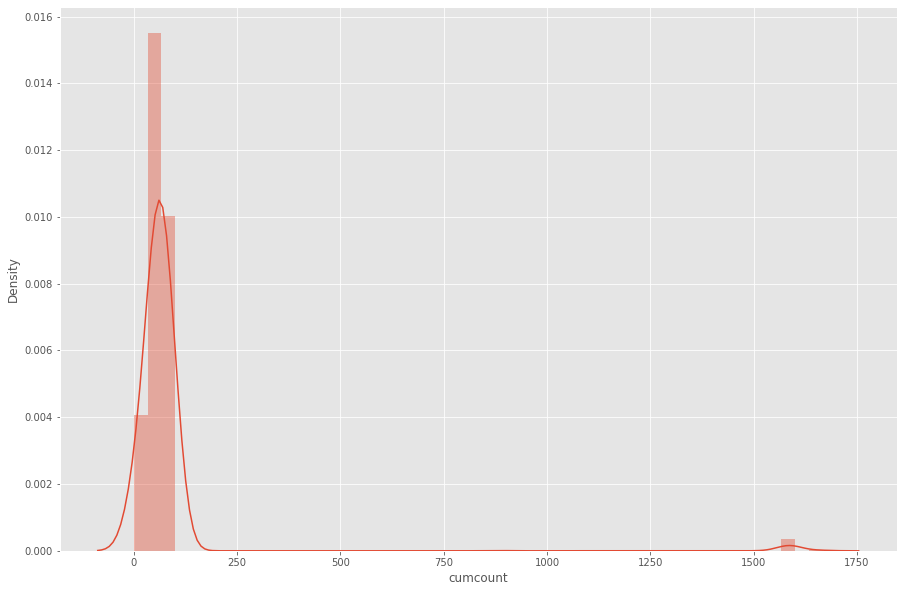

In [ ]:
sns.distplot(df.cumcount);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.cumcount)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.cumcount)))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


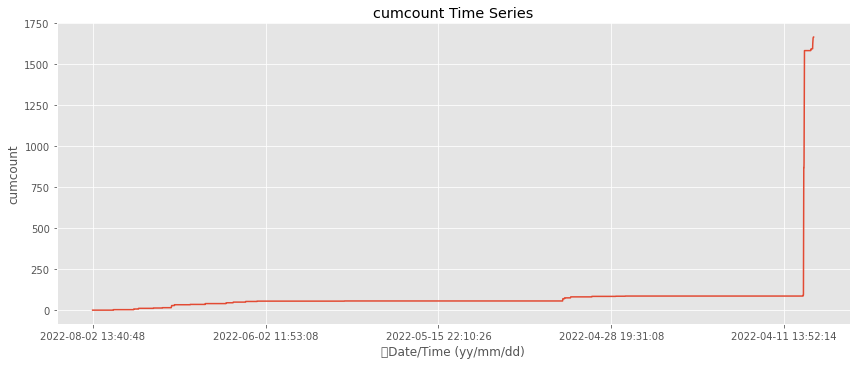

In [ ]:
df1=df.loc[:,['\tDate/Time (yy/mm/dd)','cumcount']]
df1.set_index('\tDate/Time (yy/mm/dd)',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('cumcount')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('cumcount Time Series')
sns.despine(top=True)
plt.show();

,count,mean,std,min,25%,50%,75%,max
cumcount,8340.0,79.072782,177.112425,0.0,55.0,56.0,86.0,1667.0


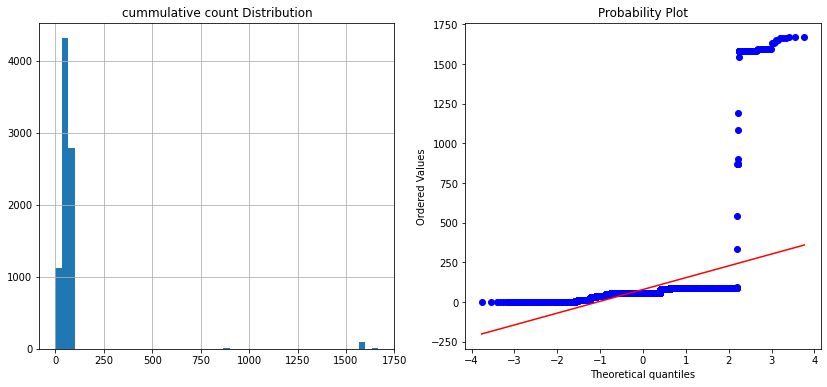

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['cumcount'].hist(bins=50)
plt.title('cummulative count Distribution')
plt.subplot(1,2,2)
stats.probplot(df['cumcount'], plot=plt);
df1.describe().T

In [ ]:
df.describe()

,ID,\tTem (C),Hum (%),\tPressure (Pa),\tRain (mm),\tLight intensity (lux),\tAx,Ay,Az,Wx,Wy,Wz,Pitch,Roll,Yaw,Count,cumcount,Force (N),Moisture (%)
count,8.340000e+03,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.0,8340.0,8340.0,8340.000000,8340.000000,8340.0,8340.000000
mean,1.039041e+06,19.939113,64.465108,945.900602,0.002358,10.773006,-0.351898,0.107228,0.818418,-31.766987,9.696164,-23.225848,0.0,0.0,0.0,0.199880,79.072782,0.0,448.020024
std,7.076057e+04,4.390001,26.399136,41.562475,0.025573,17.433779,0.142097,0.091446,0.350866,21.638384,8.239148,23.759087,0.0,0.0,0.0,6.753677,177.112425,0.0,89.846341
min,9.532920e+05,0.000000,0.000000,0.000000,0.000000,-2.000000,-0.930000,-0.950000,-0.860000,-192.500000,-8.720000,-192.500000,0.0,0.0,0.0,0.000000,0.000000,0.0,292.000000
25%,9.839562e+05,16.400000,41.000000,923.597500,0.000000,0.000000,-0.410000,0.020000,0.940000,-36.590000,6.340000,-35.120000,0.0,0.0,0.0,0.000000,55.000000,0.0,393.000000
50%,1.019069e+06,20.100000,61.000000,926.000000,0.000000,0.830000,-0.400000,0.140000,0.940000,-34.940000,7.620000,-33.720000,0.0,0.0,0.0,0.000000,56.000000,0.0,420.000000
75%,1.054082e+06,23.400000,97.000000,930.680000,0.000000,15.000000,-0.400000,0.150000,0.950000,-33.600000,9.940000,-3.480000,0.0,0.0,0.0,0.000000,86.000000,0.0,531.000000
max,1.187551e+06,34.500000,99.000000,1021.900000,0.821577,98.330000,0.300000,0.940000,1.000000,1603.840000,301.890000,1603.840000,0.0,0.0,0.0,350.000000,1667.000000,0.0,976.000000


In [ ]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import glob
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [ ]:
dataset = df['cumcount'].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6672 1668


In [ ]:
def create_dataset(dataset, look_back):
  dataX, dataY = [],[]
  for i in range(len(dataset) - look_back):

    dataX.append(np.array(dataset[i:i+look_back,:1]))
    
    dataY.append(np.array(dataset[i+look_back,:1]))
  
  return np.array(dataX),np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("train_X shape:", trainX.shape)
print("test_X shape:", testX.shape)
print("train_Y shape:", trainY.shape)
print("test_Y shape:", testY.shape)

train_X shape: (6671, 1, 1)
test_X shape: (1667, 1, 1)
train_Y shape: (6671, 1)
test_Y shape: (1667, 1)


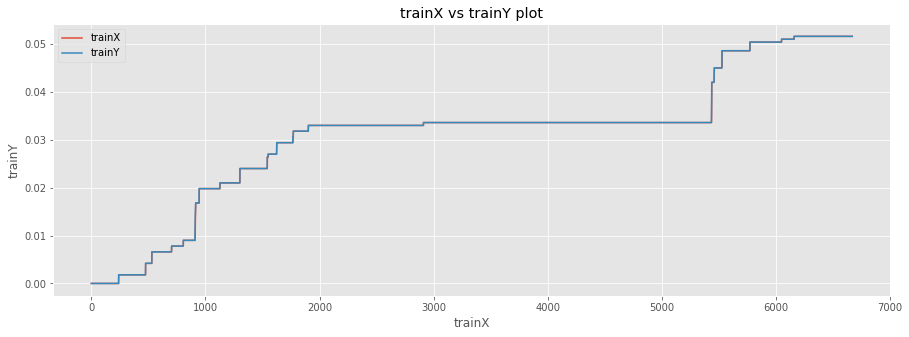

In [ ]:
trainX = trainX.reshape(-1,1)
trainY = trainY.reshape(-1,1)
plt.figure(figsize = (15,5))
plt.plot(trainX)
plt.plot(trainY)
plt.title('trainX vs trainY plot')
plt.ylabel('trainY')
plt.xlabel('trainX')
plt.legend(['trainX', 'trainY'], loc='upper left')
plt.show()

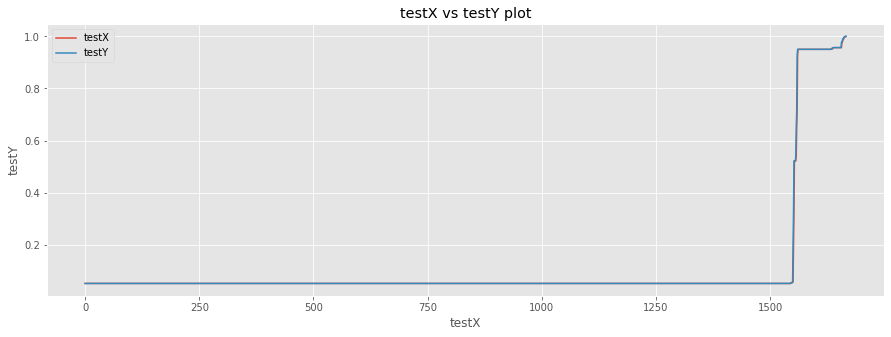

In [ ]:
testX = testX.reshape(-1,1)
testY = testY.reshape(-1,1)
plt.figure(figsize = (15,5))
plt.plot(testX)
plt.plot(testY)
plt.title('testX vs testY plot')
plt.ylabel('testY')
plt.xlabel('testX')
plt.legend(['testX', 'testY'], loc='upper left')
plt.show()

In [ ]:
testY

array([[0.05158968],
       [0.05158968],
       [0.05158968],
       ...,
       [0.99999994],
       [0.99999994],
       [0.99999994]], dtype=float32)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print('Training data size:',trainX.shape)
print('Test data size:',testX.shape)

Training data size: (6671, 1, 1)
Test data size: (1667, 1, 1)


In [ ]:
INIT_LR = 1e-4
NUM_EPOCHS = 100
BATCH_SIZE = 32

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
opt = Adam(lr=INIT_LR)
model.compile(loss='mae', optimizer=opt)
print("[INFO] training ....")
H = model.fit(trainX, trainY, epochs=NUM_EPOCHS,batch_size=BATCH_SIZE, validation_data=(testX, testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],verbose=1, shuffle=False)
model.summary()


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training ....
Epoch 1/100
209/209 [==============================] - 4s 7ms/step - loss: 0.0044 - val_loss: 0.0612
Epoch 2/100
209/209 [==============================] - 1s 5ms/step - loss: 0.0097 - val_loss: 0.0604
Epoch 3/100
209/209 [==============================] - 1s 5ms/step - loss: 0.0095 - val_loss: 0.0594
Epoch 4/100
209/209 [==============================] - 1s 4ms/step - loss: 0.0092 - val_loss: 0.0572
Epoch 5/100
209/209 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0552
Epoch 6/100
209/209 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0552
Epoch 7/100
209/209 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0530
Epoch 8/100
209/209 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0519
Epoch 9/100
209/209 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0497
Epoch 10/100
209/209 [==============================] - 1s 4ms/step - 

In [ ]:
print("[INFO] saving trained model...")
model.save(STOREDIR+'model/trained.h5', save_format="h5")

[INFO] saving trained model...


In [ ]:
testY = testY.reshape(-1,1)

In [ ]:
# prediction on test data
y_pred = model.predict(testX) 
# invert the test to original values
y_test_inverse = scaler.inverse_transform(testY) 
print('Test data:')
print(y_test_inverse)
# invert the prediction to understandable values
y_pred_inverse = scaler.inverse_transform(y_pred) 
print('Prediction data:')
print(y_pred_inverse)

Test data:
[[  86.]
 [  86.]
 [  86.]
 ...
 [1667.]
 [1667.]
 [1667.]]
Prediction data:
[[  86.04817]
 [  86.04817]
 [  86.04817]
 ...
 [1780.5742 ]
 [1785.3451 ]
 [1785.3453 ]]


In [ ]:
#error calculation on test data
print(f'MAE {mean_absolute_error(testY, y_pred)}')
print(f'MSE {mean_squared_error(testY, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(testY, y_pred))}')
print(f'R2 {r2_score(testY, y_pred)}')

MAE 0.004505940712988377
MSE 0.0003227651468478143
RMSE 0.017965665087103844
R2 0.99359986430888


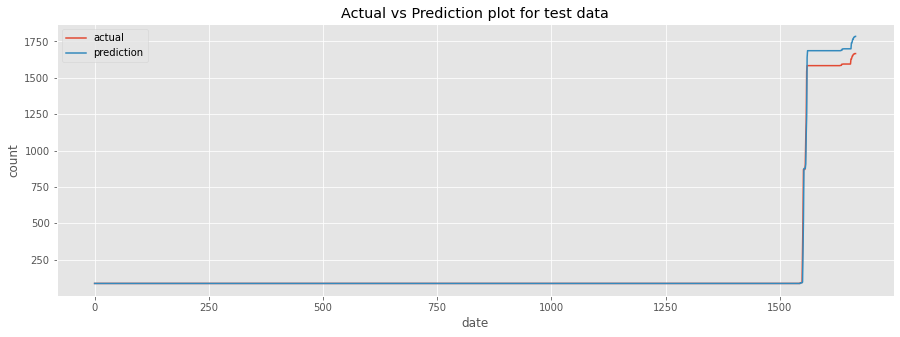

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(y_test_inverse)
plt.plot(y_pred_inverse)
plt.title('Actual vs Prediction plot for test data')
plt.ylabel('count')
plt.xlabel('date')
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()

In [ ]:
# train data
# prediction on train data
y_pred = model.predict(trainX) 
# invert the test to original values
y_train_inverse = scaler.inverse_transform(trainY) 
print('Train data:')
print(y_test_inverse)
# invert the prediction to understandable values
y_pred_inverse = scaler.inverse_transform(y_pred) 
print('Prediction data:')
print(y_pred_inverse)

Train data:
[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [86.]
 [86.]
 [86.]]
Prediction data:
[[ 6.8441978]
 [ 6.8441978]
 [ 6.8441978]
 ...
 [86.04817  ]
 [86.04817  ]
 [86.04817  ]]


In [ ]:
#error calculation on train data
print(f'MAE {mean_absolute_error(trainY, y_pred)}')
print(f'MSE {mean_squared_error(trainY, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(trainY, y_pred))}')
print(f'R2 {r2_score(trainY, y_pred)}')

MAE 0.0015597754390910268
MSE 3.5633806874102447e-06
RMSE 0.001887691905722022
R2 0.9804826323341366


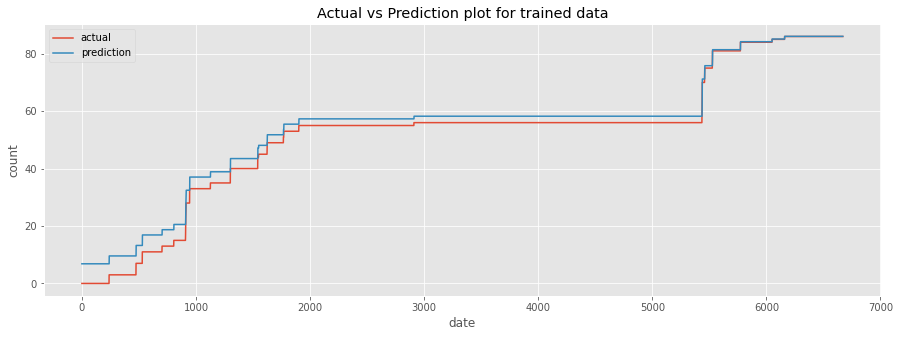

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(y_train_inverse)
plt.plot(y_pred_inverse)
plt.title('Actual vs Prediction plot for trained data')
plt.ylabel('count')
plt.xlabel('date')
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()